# Example of the aitlas toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the aitlas toolbox.

## Import the required packages

In [ ]:
from aitlas.datasets import AeroscapesDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTranspose

## Visualize images and masks

Total number of patches: 2621


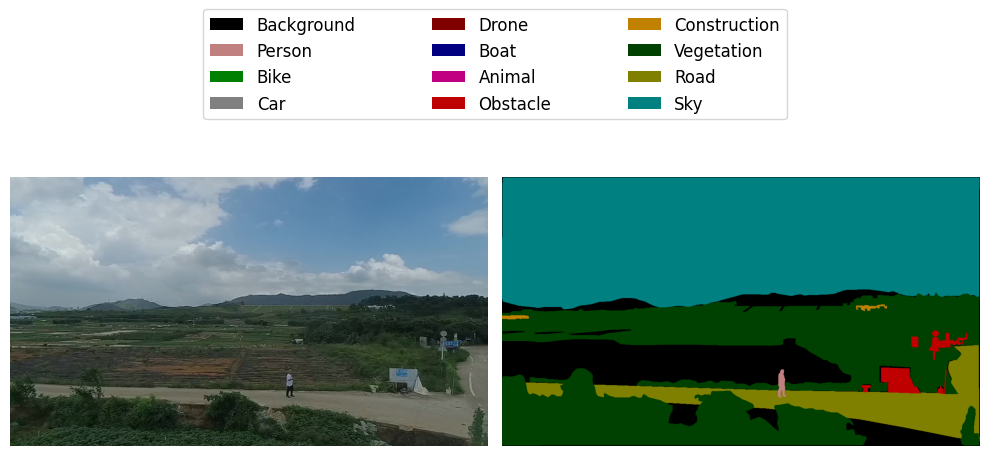

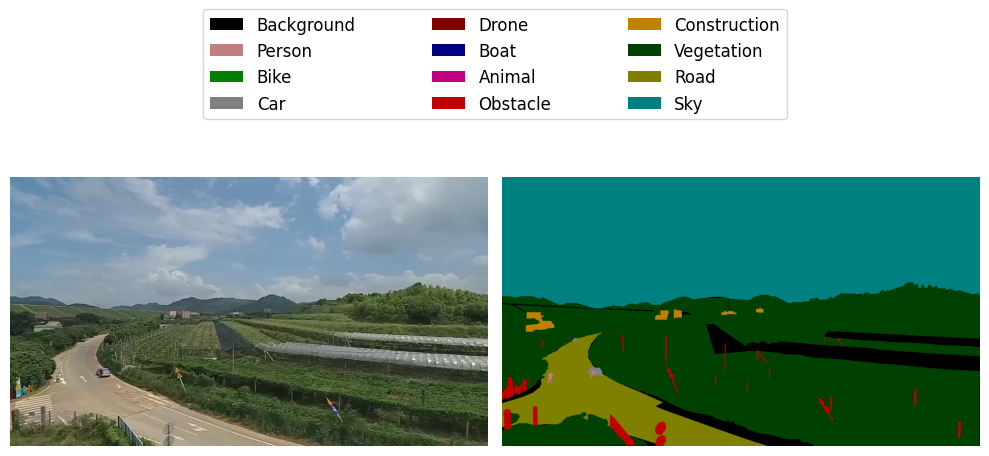

In [2]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/aeroscapes/train"
}
dataset = AeroscapesDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1);
dataset.show_image(150);

In [5]:
dataset.data_distribution_table()

,Number of pixels
Background,555900672.0
Person,10402499.0
Bike,1531710.0
Car,8283476.0
Drone,650353.0
Boat,548987.0
Animal,1663688.0
Obstacle,14487197.0
Construction,91507496.0
Vegetation,854898368.0


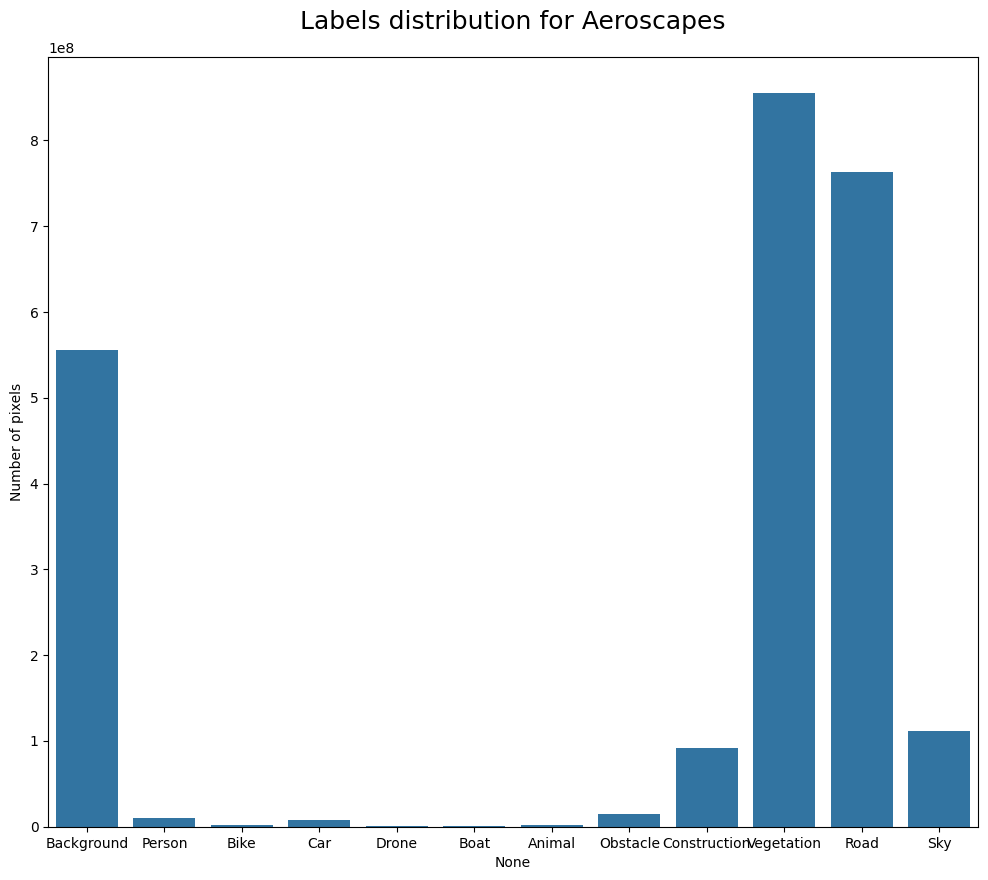

In [6]:
dataset.data_distribution_barchart();

## Load training data ##

In [3]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/aeroscapes/train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = AeroscapesDataset(train_dataset_config)
len(train_dataset)

2621

## Create the model ##

In [4]:
epochs = 5
model_directory = "/home/dragik/data/semseg/aeroscapes/experiments"
model_config = {
    "num_classes": 12, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [5]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2024-05-07 07:42:56,377 INFO Starting training.
2024-05-07 07:42:56.499265: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
training: 100%|███████████████████████████████████████████████████████████████████████| 655/655 [07:16<00:00,  1.50it/s]
2024-05-07 07:50:13,837 INFO epoch: 1, time: 436, loss:  0.42562
testing on train set: 100%|███████████████████████████████████████████████████████████| 655/655 [02:16<00:00,  4.79it/s]
2024-05-07 07:52:31,730 INFO IOU:0.8764691556835662, IOU mean:0.3624390669272184, IOU per Class:[0.80376202 0.         0.         0.         0.         0.
 0.         0.         0.72214359 0.9339839  0.91700273 0.97237657]
training: 100%|███████████████████████████████████████████████████████████████████████| 655/655 [07:15<00:00,  1.51it/s]
2024-05-07 07:59:46,917 INFO epoch: 2, time: 435, loss:  0.11108
testing on train set: 100%|███████████████████████████████████████████████████████████| 65

## Evaluate the model

In [6]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/aeroscapes/val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = AeroscapesDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/aeroscapes/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2024-05-07 08:31:44,384 INFO Loading checkpoint /home/dragik/data/semseg/aeroscapes/experiments/checkpoint.pth.tar
2024-05-07 08:31:44,879 INFO Loaded checkpoint /home/dragik/data/semseg/aeroscapes/experiments/checkpoint.pth.tar at epoch 6
testing on test set: 100%|████████████████████████████████████████████████████████████| 162/162 [00:32<00:00,  4.95it/s]


[{'IOU': 0.8429402888489744,
  'IOU mean': 0.34348652759041,
  'IOU per Class': array([0.75144946, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.63831375, 0.92846221,
         0.88864944, 0.91496347])}]

## Predictions

2024-05-07 08:49:30,820 INFO Loading checkpoint /home/dragik/data/semseg/aeroscapes/experiments/checkpoint.pth.tar
2024-05-07 08:49:31,180 INFO Loaded checkpoint /home/dragik/data/semseg/aeroscapes/experiments/checkpoint.pth.tar at epoch 6


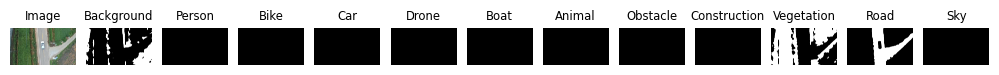

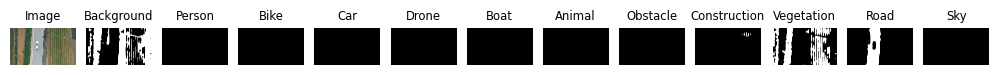

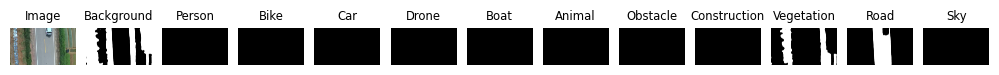

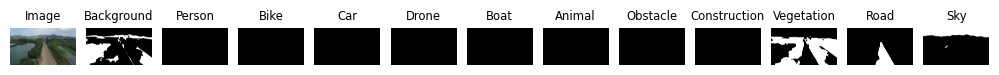

In [12]:
model_path = "/home/dragik/data/semseg/aeroscapes/experiments/checkpoint.pth.tar"
labels = ["Background","Person","Bike","Car","Drone","Boat","Animal","Obstacle","Construction","Vegetation","Road","Sky"]
transform = MinMaxNormTranspose()
model.load_model(model_path)
plt.rcParams.update({'font.size': 7})

image = image_loader('/home/dragik/data/semseg/aeroscapes/val/images/002000_004.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/aeroscapes/val/images/002000_046.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/aeroscapes/val/images/002002_030.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/aeroscapes/val/images/002102_034.jpg')
fig = model.predict_masks(image, labels, transform)